<a href="https://colab.research.google.com/github/curoled345/Automoblie-Project/blob/main/0710_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install yt_dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 43.1 MB/s eta 0:00:00


In [ ]:
import cv2
import yt_dlp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from google.colab.patches import cv2_imshow
import os

In [ ]:
!pip install --upgrade yt-dlp

# 원하는 유튜브 영상 다운로드
!yt-dlp -f bestvideo https://www.youtube.com/watch?v=tEtWnGwwCEc

[youtube] Extracting URL: https://www.youtube.com/watch?v=tEtWnGwwCEc
[youtube] tEtWnGwwCEc: Downloading webpage
[youtube] tEtWnGwwCEc: Downloading tv client config
[youtube] tEtWnGwwCEc: Downloading player ef259203-main
[youtube] tEtWnGwwCEc: Downloading tv player API JSON
[youtube] tEtWnGwwCEc: Downloading ios player API JSON
[youtube] tEtWnGwwCEc: Downloading m3u8 information
[info] tEtWnGwwCEc: Downloading 1 format(s): 313
[download] Destination: 강남대로 강남역 도로 드라이브 최근 밤거리 모습 입니다. [tEtWnGwwCEc].webm
[download] 100% of  239.46MiB in 00:00:03 at 63.56MiB/s


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

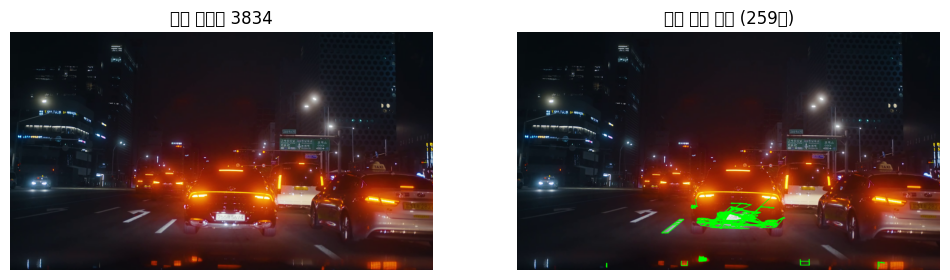

📺 영상 재생 완료


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import clear_output
import time

# 영상 경로
video_path = "/content/강남대로 강남역 도로 드라이브 최근 밤거리 모습 입니다. [tEtWnGwwCEc].webm"

# 영상 열기
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"📹 영상 정보: {frame_count}프레임, {fps:.2f}FPS")
print("🎬 차선 인식 및 영상 저장 시작! (Ctrl+C로 중단)")

# 결과 저장을 위한 VideoWriter 설정
output_path = "/content/lane_detection_result.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 또는 'XVID'
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

frame_num = 0
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("📺 영상 재생 완료")
            break

        # 1. 그레이스케일 변환
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # 2. 블러 + Canny 에지
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        edges = cv2.Canny(blur, 30, 100)

        # 3. ROI 설정
        height, width = edges.shape
        mask = np.zeros_like(edges)
        polygon = np.array([[
            (int(width * 0.1), height),
            (int(width * 0.9), height),
            (int(width * 0.6), int(height * 0.7)),
            (int(width * 0.4), int(height * 0.7))
        ]])
        cv2.fillPoly(mask, polygon, 255)
        roi = cv2.bitwise_and(edges, mask)

        # 4. 허프 변환으로 직선 검출
        lines = cv2.HoughLinesP(roi, 2, np.pi / 180,
                                threshold=30,
                                minLineLength=30,
                                maxLineGap=80)

        # 5. 선 그리기
        line_image = frame.copy()
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)

        # 6. 결과 영상 저장
        out.write(line_image)

        # 7. 중간 출력 확인 (옵션)
        if frame_num % int(fps * 3) == 0:  # 3초마다 1장 출력
            clear_output(wait=True)
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f"원본 프레임 {frame_num}")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
            plt.title(f"차선 인식 결과 ({len(lines) if lines is not None else 0}개)")
            plt.axis('off')
            plt.show()

        frame_num += 1

except KeyboardInterrupt:
    print("\n⏹️ 재생 중단")

cap.release()
out.release()

# 저장된 영상 다운로드
files.download(output_path)

/tmp/ipython-input-11-169946669.py:103: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


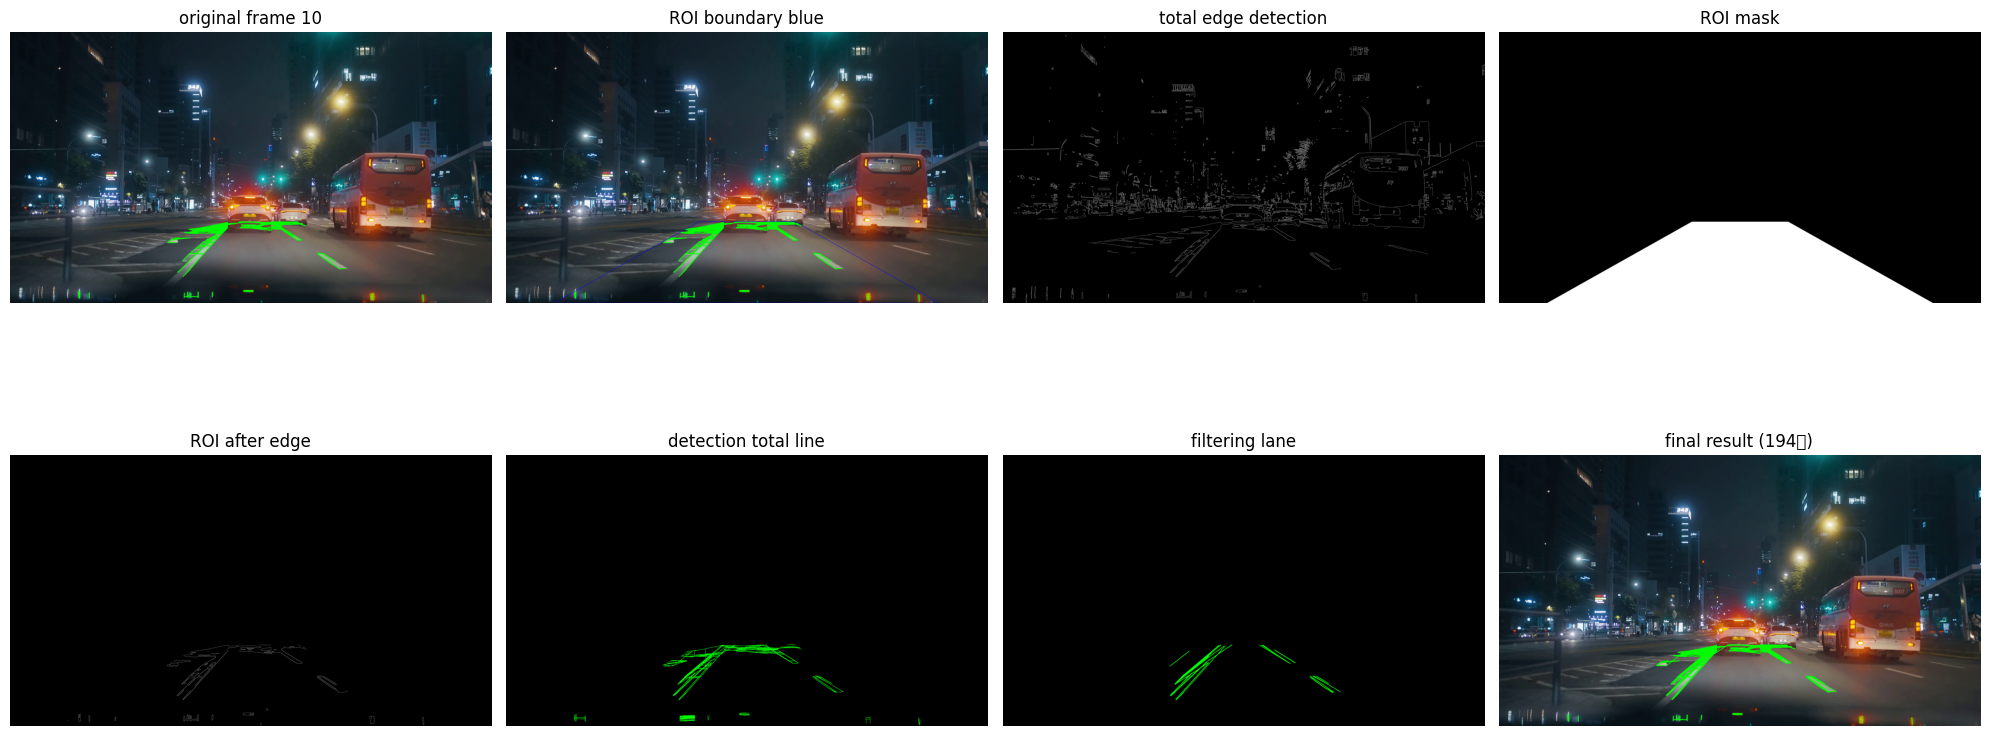

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import clear_output

# 업로드한 영상 경로
video_path = "/content/lane_detection_result.mp4"
cap = cv2.VideoCapture(video_path)

# 10번째 프레임을 예시로
cap.set(cv2.CAP_PROP_POS_FRAMES, 10)
ret, frame = cap.read()
if not ret:
    print("❌ 프레임 읽기 실패")
    cap.release()
else:
    # 1. 원본 저장
    original = frame.copy()

    # 2. ROI 설정
    height, width = frame.shape[:2]
    roi_vertices = np.array([[
        (int(width * 0.1), height),
        (int(width * 0.9), height),
        (int(width * 0.6), int(height * 0.7)),
        (int(width * 0.4), int(height * 0.7))
    ]], dtype=np.int32)

    roi_mask = np.zeros_like(frame[:, :, 0])
    cv2.fillPoly(roi_mask, roi_vertices, 255)

    # 3. ROI boundary를 원본에 시각화 (파란 선)
    frame_with_roi = original.copy()
    cv2.polylines(frame_with_roi, roi_vertices, isClosed=True, color=(255, 0, 0), thickness=2)

    # 4. Canny 엣지
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 30, 100)

    # 5. ROI 마스크 적용
    roi_edges = cv2.bitwise_and(edges, roi_mask)

    # 6. Hough Transform 전체 라인 검출
    lines = cv2.HoughLinesP(roi_edges, 2, np.pi / 180, threshold=30, minLineLength=30, maxLineGap=100)

    total_line_img = np.zeros_like(frame)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(total_line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # 7. 차선 필터링 (예: 좌우 기울기 기준)
    filtered_line_img = np.zeros_like(frame)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            slope = (y2 - y1) / (x2 - x1 + 1e-6)
            if 0.5 < abs(slope) < 2.5:  # 적당한 기울기만
                cv2.line(filtered_line_img, (x1, y1), (x2, y2), (0, 255, 0), 3)

    # 8. 최종 결과: 원본 위에 차선 표시
    final = original.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            slope = (y2 - y1) / (x2 - x1 + 1e-6)
            if 0.5 < abs(slope) < 2.5:
                cv2.line(final, (x1, y1), (x2, y2), (0, 255, 0), 4)

    # 9. 시각화
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    axs = axs.ravel()

    axs[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axs[0].set_title("original frame 10")

    axs[1].imshow(cv2.cvtColor(frame_with_roi, cv2.COLOR_BGR2RGB))
    axs[1].set_title("ROI boundary blue")

    axs[2].imshow(edges, cmap='gray')
    axs[2].set_title("total edge detection")

    axs[3].imshow(roi_mask, cmap='gray')
    axs[3].set_title("ROI mask")

    axs[4].imshow(roi_edges, cmap='gray')
    axs[4].set_title("ROI after edge")

    axs[5].imshow(cv2.cvtColor(total_line_img, cv2.COLOR_BGR2RGB))
    axs[5].set_title("detection total line")

    axs[6].imshow(cv2.cvtColor(filtered_line_img, cv2.COLOR_BGR2RGB))
    axs[6].set_title("filtering lane")

    axs[7].imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))
    axs[7].set_title(f"final result ({len(lines) if lines is not None else 0}개)")

    for ax in axs:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

cap.release()
